# Pregunta 3 - Análisis de emociones en tweets


El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud que se manifiesta con respecto a un tópico o contexto de comunicación. El análisis de emociones ha sido extendido a varios medios en la actualidad, como lo son las redes sociales.
La conocida red social Twitter tiene una gran cantidad de usuarios, por lo que la información se genera a
cada segundo y el análisis de texto ha tomado bastante fuerza. La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente sus usuarios así como el manejo de negaciones, sarcasmo y abreviaciones en una frase.  

Para esta actividad se trabajará con un dataset de tweets ofrecidos por CrowdFlower. Cada tweet está
asociado a una emoción en particular, donde los conjunto de emociones se trabajarán excluyentemente, siendo un problema de múltiples clases.


#### a. Construir un dataframe con los datos, determinar clases y registros por clase.

In [1]:
import pandas as pd
df = pd.read_csv('text_emotion.csv')

In [2]:
print (df.shape)
print (df.columns)

(40000, 4)
Index(['tweet_id', 'sentiment', 'author', 'content'], dtype='object')


El dataset sobre el cual se trabaja está compuesto por 40000 registros. Cada uno de ellos descrito por 4 características que son 'tweet_id', 'sentiment', 'author' y 'content'.  
Los primeros registros del dataset se muestran a continuación:

In [3]:
df.head()

tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...

Se observa que los registros describen 40000 tweets (content) emitidos por diferentes usuarios (author), cada uno asociado principalmene a una emoción (sentiment).  
Para esta sección se trabajará en base a los tweets almacenados (content) que se procesarán para realizar la futura clasificación de sentimientos de un post, es decir, la determinación de la emoción prioritaria asociada a un futuro tweet.

#### b. Construir un conjunto de entrenamiento y de pruebas, a través de una máscara aleatoria.

In [4]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

In [5]:
len(df_train.content)

31956

In [6]:
len(df_test.content)

8044

 Se aplica un máscara aleatoria (msk), la cual se especifica de modo que separe los datos en proporciones aproximadas a 80%-20% (train-test). Es decir, se guarda el 80% inicial de los datos/dataframe para aplicarlos a una futura máquina en el proceso de entrenamiento y el 20% restante de los datos se proponen ser utilizados para verificar los resultados de los algoritmos.


#### c. Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato estandarizado.

In [7]:
def remove_punctuation ( text ):
    return re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

remove_punctuation, tal como su nombre lo indica, remueve todas las expresiones literales de signos de puntuación del texto (text) ingresado. Esta función es necesaria puesto que los puntos,comas,signos de interrogación,etc no son de utilidad o, no aportan información, cuando se busca analizar textos.

In [8]:
from nltk.corpus import stopwords
import re, string
def pre_procesar(lista_posts):
    transformar2=[]
    for i in lista_posts:
        a=' '.join(re.sub("(@[A-Za-z0-9]+)|(\w+:\/\/\S+)"," ",i).split())
        transformar2.append(a)
    transformar_low = [registro.lower() for registro in transformar2]
    transformar_tok = []
    for reg in transformar_low:
        transformar_tok.append(nltk.word_tokenize(remove_punctuation(reg)))

    stoplist = stopwords.words('english')
    transformar_stop=[]
    for reg in transformar_tok:
        clean = [token for token in reg if token not in stoplist ]
        transformar_stop.append(clean)
    transformar_clean1=[]
    for reg in transformar_tok:
        temp=[]
        for reg2 in reg:
            a= re.sub(r'\b[a-z]\b', ' ', reg2)
            if len(a)!=1:
                temp.append(a)
        transformar_clean1.append(temp)
    transformar_clean2=[]
    for reg in transformar_clean1:
        temp=[]
        for reg2 in reg:
            a=re.sub(r'\b[a-z][a-z]\b', ' ', reg2)
            if len(a)!=1:
                temp.append(a)
        transformar_clean2.append(temp)
    return transformar_clean2

pre_procesar lleva a cabo el proceso completo de limpieza del tweet a trabajar. 
Cómo?  
Recibe la lista de tweets del dataframe, se eliminan los posibles hashtags utilizados así como las páginas web/links que estén presentes en el post haciendo uso de expresiones regulares.  
Además de esto, se pasan todos los términos a minúsculas y se eliminan aquellos que corresponda a 'stopwords' es decir, aquellas palabras que no entreguen información por sí solas. Se eliminan también aquellas palabras de largo 1 y 2 que hayan permanecido en el tweet.  
Cabe destacar que este proceso es de gran importancia a la hora de proponerse analizar texto puesto que con esto se logra eliminar gran cantidad de términos 
   


In [9]:
import scipy as sp
import matplotlib as plt
import nltk
transformar= df_train.content
print ("Los datos de entrenamiento están compuestos por", transformar.shape[0], "registros")
transformar.tolist()
print (transformar[:10])

Los datos de entrenamiento están compuestos por 31956 registros
0     @tiffanylue i know  i was listenin to bad habi...
1     Layin n bed with a headache  ughhhh...waitin o...
2                   Funeral ceremony...gloomy friday...
3                  wants to hang out with friends SOON!
6     I should be sleep, but im not! thinking about ...
7                  Hmmm. http://www.djhero.com/ is down
8               @charviray Charlene my love. I miss you
9            @kelcouch I'm sorry  at least it's Friday?
10                                     cant fall asleep
12    Ugh! I have to beat this stupid song to get to...
Name: content, dtype: object


Se propone actualizar el preprocesamiento utilizando libreria python **abbreviate** https://pypi.python.org/pypi/abbreviate/0.1.1

In [10]:
def to_text(lista_prepro):
    cleaned=[]
    for reg in lista_prepro:
        final = ""
        for reg2 in reg: 
            final += reg2 + " "
        cleaned.append(final)
    #cleaned[:10]
    return cleaned

In [11]:
preprocesa2= pre_procesar(transformar)
tweets_cleaned=to_text(preprocesa2)
len(tweets_cleaned)

31956

#### d. Haga una reducción binaria al problema, para trabajarlo como un problema de clasificacion de dos clases. Para esto, agrupe las distintas emociones como positivas y negativas (defina un criterio), se recomienda codificar las clases como +1 y −1 respectivamente. Recuerde tener presente que el desbalanceo de los datos puede afectar considerablemente al modelo.

#### Clasificación de emociones positivas y negativas (manual)

In [12]:
e_posit=[]
e_negat=[]
emociones=df_train.sentiment
print (emociones[:10])
print (emociones.shape)

0          empty
1        sadness
2        sadness
3     enthusiasm
6        sadness
7          worry
8        sadness
9        sadness
10       neutral
12       sadness
Name: sentiment, dtype: object
(31956,)


In [13]:
freq_emoc= nltk.FreqDist(emociones)
freq_emoc

FreqDist({'anger': 86,
          'boredom': 150,
          'empty': 677,
          'enthusiasm': 602,
          'fun': 1409,
          'happiness': 4136,
          'hate': 1082,
          'love': 3123,
          'neutral': 6866,
          'relief': 1222,
          'sadness': 4120,
          'surprise': 1737,
          'worry': 6746})

In [14]:
x_plot= freq_emoc.keys()
print (x_plot)
y_plot= freq_emoc.values()
print (y_plot)


dict_keys(['neutral', 'boredom', 'sadness', 'worry', 'enthusiasm', 'hate', 'fun', 'happiness', 'surprise', 'love', 'anger', 'relief', 'empty'])
dict_values([6866, 150, 4120, 6746, 602, 1082, 1409, 4136, 1737, 3123, 86, 1222, 677])


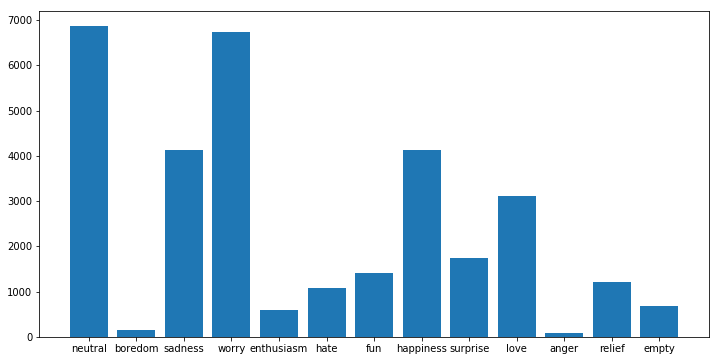

In [15]:
import matplotlib.pyplot as plt
xx=[]
yy=list(y_plot)
for i in range(len(x_plot)):
    xx.append(i)
fig = plt.figure(figsize=(12,6))
plt.bar(xx, yy, align='center')
LABELS=list(x_plot)
plt.xticks(xx, LABELS)
plt.show()

In [16]:
df[10:30]

tweet_id sentiment           author  \
10  1956969456   neutral       feinyheiny   
11  1956969531     worry     dudeitsmanda   
12  1956970047   sadness         Danied32   
13  1956970424   sadness          Samm_xo   
14  1956970860  surprise     okiepeanut93   
15  1956971077   sadness           Sim_34   
16  1956971170      love     poppygallico   
17  1956971206   sadness  brokenangel1982   
18  1956971473     worry            LCJ82   
19  1956971586   sadness          cleepow   
20  1956971981     worry    andreagauster   
21  1956972097       fun    schiz0phren1c   
22  1956972116   neutral            jansc   
23  1956972270     worry        sweet8181   
24  1956972359   sadness   xamountoftruth   
25  1956972444     worry       jomama6881   
26  1956972557   sadness       LilithGaea   
27  1956972884     worry      oONEPTUNEOo   
28  1956973598   sadness  username_origin   
29  1956973690     worry    catchtheapple   

                                              content  
10                                   cant fall asleep  
11                            Choked on her retainers  
12  Ugh! I have to beat this stupid song to get to...  
13  @BrodyJenner if u watch the hills in london u ...  
14                                       Got the news  
15      The storm is here and the electricity is gone  
16                               @annarosekerr agreed  
17  So sleepy again and it's not even that late. I...  
18  @PerezHilton lady gaga tweeted about not being...  
19  How are YOU convinced that I have always wante...  
20  @raaaaaaek oh too bad! I hope it gets better. ...  
21  Wondering why I'm awake at 7am,writing a new s...  
22  No Topic Maps talks at the Balisage Markup Con...  
23  I ate Something I don't know what it is... Why...  
24  so tired and i think i'm definitely going to g...  
25  On my way home n having 2 deal w underage girl...  
26  @IsaacMascote  i'm sorry people are so rude to...  
27  Damm servers still down  i need to hit 80 befo...  
28  Fudge.... Just BS'd that whole paper.... So ti...  
29      I HATE CANCER. I HATE IT I HATE IT I HATE IT.

In [17]:
positive= ['enthusiasm', 'fun', 'happiness', 'love', 'relief', 'neutral']
negative= ['empty', 'sadness', 'worry', 'surprise', 'hate', 'boredom', 'anger']
total_posit=0
total_negat=0
for i in LABELS:    
    if i in positive:
        total_posit+=yy[LABELS.index(i)]
    else:
        total_negat+=yy[LABELS.index(i)]
print ("Número de registros con emociones positivas: ", total_posit)
print ("Número de registros con emociones negavivos: ", total_negat)

Número de registros con emociones positivas:  17358
Número de registros con emociones negavivos:  14598


In [67]:
clasifications=[]
clasifications_test=[]

for i in emociones:
    if i in positive:
        clasifications.append(1)
    else:
        clasifications.append(-1)

for i in df_test.sentiment:
    if i in positive:
        clasifications_test.append(1)
    else:
        clasifications_test.append(-1)

print (clasifications[:20])
print (clasifications_test[:20])

[-1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1]


In [19]:
tweets_cleaned[:20]

['know was listenin bad habit earlier and started freakin his part ',
 'layin bed with headache ughhhh waitin your call ',
 'funeral ceremony gloomy friday ',
 'wants hang out with friends soon ',
 'should sleep but not thinking about old friend who want but married now damn amp wants scandalous ',
 'hmmm down ',
 'charlene love miss you ',
 'sorry least friday ',
 'cant fall asleep ',
 'ugh have beat this stupid song get the next rude ',
 'the storm here and the electricity gone ',
 'agreed ',
 'sleepy again and not even that late fail once again ',
 'lady gaga tweeted about not being impressed her video leaking just you know ',
 'how are you convinced that have always wanted you what signals did give off damn think just lost another friend ',
 'topic maps talks the balisage markup conference 2009 program online via topicmaps ',
 'ate something don know what why keep telling things about food ',
 'sorry people are rude you isaac they should get some manners and know better than lewd '

### Otro método para etiquetar

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [21]:
print (sid.polarity_scores('you re ugly'))
print (sid.polarity_scores('you'))
print (sid.polarity_scores('re'))
print (sid.polarity_scores('ugly'))

{'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'compound': -0.5106}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5106}


In [22]:
positivos=0
negativos=0
for i in tweets_cleaned:
    sentencia_preprocesada = i
    result=sid.polarity_scores(sentencia_preprocesada)
    print (sentencia_preprocesada, "\n", result)
    print ("")
    if result['neg']<result['pos']:
        positivos+=1
    else:
        negativos+=1

print (positivos)
print (negativos)

know was listenin bad habit earlier and started freakin his part  
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.5423}

layin bed with headache ughhhh waitin your call  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

funeral ceremony gloomy friday  
 {'neg': 0.672, 'neu': 0.328, 'pos': 0.0, 'compound': -0.4767}

wants hang out with friends soon  
 {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.4767}

should sleep but not thinking about old friend who want but married now damn amp wants scandalous  
 {'neg': 0.303, 'neu': 0.483, 'pos': 0.214, 'compound': -0.5267}

hmmm down  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

charlene love miss you  
 {'neg': 0.205, 'neu': 0.256, 'pos': 0.538, 'compound': 0.5574}

sorry least friday  
 {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.0772}

cant fall asleep  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ugh have beat this stupid song get the next rude  
 {'neg': 0.583, 'neu': 0.417, 'po

omg alive lol 2day has gone sooo slow going insane grrr you doing anything tonight  
 {'neg': 0.2, 'neu': 0.537, 'pos': 0.263, 'compound': 0.3182}

have headache going bed goodnight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

was watching parental control  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

did you get them from california vintage ahahah they have the best dresses want them but dont have ebay  
 {'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.4118}

just saw pics from this past thanksgiving and sad because grandma was them  
 {'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.4767}

wont let  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

but now have money for phone  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

spent last night amp wife tangled wheels with daughter amp hit the deck dislocation amp fracture resulted  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

days about ready visit torchwood and see the

taking nap after work sleep right now the nap felt soooo good but now seems like bad idea  
 {'neg': 0.19, 'neu': 0.601, 'pos': 0.208, 'compound': -0.1406}

going home seriously had enough  
 {'neg': 0.298, 'neu': 0.702, 'pos': 0.0, 'compound': -0.1779}

miss oklahomaaaaa listening citizen cope til pass out  
 {'neg': 0.186, 'neu': 0.814, 'pos': 0.0, 'compound': -0.1531}

tense emotional not  
 {'neg': 0.48, 'neu': 0.2, 'pos': 0.32, 'compound': -0.2023}

have fun miss you guys lot  
 {'neg': 0.18, 'neu': 0.449, 'pos': 0.371, 'compound': 0.4019}

that makes sad for you  
 {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}

playing the game watching straight people hook but can leave because another reason  
 {'neg': 0.092, 'neu': 0.707, 'pos': 0.201, 'compound': 0.1406}

yeah work today never mind only one day then sun sun sun  
 {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.296}

feels like going cough lung  
 {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3

 {'neg': 0.233, 'neu': 0.628, 'pos': 0.139, 'compound': -0.4753}

that miserable afterparty report  
 {'neg': 0.516, 'neu': 0.484, 'pos': 0.0, 'compound': -0.4939}

rented bikes unknown trail with random bumps big hills kids one beat little girl not good day the family vacation  
 {'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'compound': -0.2829}

feel like ive done the london marathon ach all over  
 {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}

going die from study overload this weekend too much homework with paying work interrupt screwed  
 {'neg': 0.522, 'neu': 0.478, 'pos': 0.0, 'compound': -0.9001}

not excited blowing out another candle today when was kid  
 {'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'compound': -0.2584}

sigh always sad when you watch the series finale more green wing left watch  
 {'neg': 0.191, 'neu': 0.741, 'pos': 0.068, 'compound': -0.4588}

yeps just for today though badly wanted some geek shopping  
 {'neg': 0.38, 'neu': 0.62, 'pos': 0.0, 'compou


start work moro 30 not looking forward  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

being lonely all the time  
 {'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'compound': -0.3612}

still track move back albeit years however buddy jen now moving with fast track  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

and have wear damn jacket today cos didnt notice mark shirt  
 {'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'compound': -0.4019}

god the weather london ammmmazing yet train half the day  
 {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.2732}

did shed few tears watching the preview for next weeks medium scared addicted this show love  
 {'neg': 0.218, 'neu': 0.591, 'pos': 0.191, 'compound': 0.1027}

can you ask ryan why stopped following twitter  
 {'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'compound': -0.2263}

friday have keep reminding myself since every day seems the same  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

going see angels and demons 

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

with you there filing much less fun than sorting cos you still have look amp hunt down details  
 {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.4601}

also shall missing lauren when she goes for week  
 {'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.296}

hate that  
 {'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

how wish get least days off row day off not enough rest days day off days day off ugh  
 {'neg': 0.124, 'neu': 0.756, 'pos': 0.12, 'compound': -0.0258}

having trouble finding really yummy egg free ice cream favoriteicecream got any recommendations anyone  
 {'neg': 0.129, 'neu': 0.525, 'pos': 0.346, 'compound': 0.6764}

just spent hours looking for blog topic and ended inventing own grrrr  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

mayb was raped when was younger  
 {'neg': 0.479, 'neu': 0.521, 'pos': 0.0, 'compound': -0.6808}

tired think becoming too old out  
 {'neg': 0.3


and had our first fight  
 {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.3818}

need get hand  
 {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4939}

don worry iphone users are just privileged wish were heading the pool  
 {'neg': 0.166, 'neu': 0.514, 'pos': 0.32, 'compound': 0.4019}

lawrence did you forget something this morning you nearly ran over the bottom the hill its very very warm the shop  
 {'neg': 0.081, 'neu': 0.813, 'pos': 0.106, 'compound': 0.1459}

preparing for spanish baaaaaaaaaah  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

good sized family room not too cramped watched match room watched iplayer after kids asleep  
 {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4404}

1am quietly tidying after dinner party whilst closing tupprwre lid centre island kitchen collapses wakes baby mayhem ensues  
 {'neg': 0.105, 'neu': 0.766, 'pos': 0.129, 'compound': 0.128}

some the figures quoted are wildly optimistic they are the stuff science

guy coming see car late  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

dad not feeling well want make him soup suggestions guys get well soon ayah  
 {'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.4973}

rain got big weather cold right now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have too much homework today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sorry but lol what this about waitt you think your mum would still let you bday stuff this weekend  
 {'neg': 0.053, 'neu': 0.778, 'pos': 0.169, 'compound': 0.5499}

you have email her she only gets what people want they aren the site shame about the trousers  
 {'neg': 0.152, 'neu': 0.784, 'pos': 0.064, 'compound': -0.4215}

where were via meetings  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

waiting for hetzner fix server seems like interspire sendstudio caused the problems  
 {'neg': 0.178, 'neu': 0.658, 'pos': 0.164, 'compound': -0.0516}

barnsley keep davey and sign new 


tequila never ends being good decision  
 {'neg': 0.325, 'neu': 0.675, 'pos': 0.0, 'compound': -0.3412}

moved with the other half balcony anymore have got great mini herb garden window sill though you  
 {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.6249}

morning all and since only have few more days move won able stay long  
 {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.6077}

think that may look little silly also camera broken photo  
 {'neg': 0.349, 'neu': 0.651, 'pos': 0.0, 'compound': -0.5095}

supernatural liked old ruby best  
 {'neg': 0.0, 'neu': 0.3, 'pos': 0.7, 'compound': 0.7906}

confuzzled  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

unfortunately that how usually goes answer yesterday okay things may looking miss talking you  
 {'neg': 0.237, 'neu': 0.651, 'pos': 0.112, 'compound': -0.2732}

because couldn get the money mikey time trust makes sad too  
 {'neg': 0.201, 'neu': 0.584, 'pos': 0.214, 'compound': 0.0516}

really cant bothered 


thanks got hurt wednesday and going vets today  
 {'neg': 0.276, 'neu': 0.488, 'pos': 0.236, 'compound': -0.128}

that happened once only wasn drunk lol  
 {'neg': 0.235, 'neu': 0.49, 'pos': 0.275, 'compound': 0.1027}

sad feel bad when hear they look like mid 30 like something wld see lifetime  
 {'neg': 0.292, 'neu': 0.487, 'pos': 0.221, 'compound': -0.3818}

sir woulda put honey but don have any  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

besides haven had strep for like 10 years because that reason more tired than anything else  
 {'neg': 0.162, 'neu': 0.711, 'pos': 0.127, 'compound': -0.1761}

glad see the sun out dublin after great week london back work  
 {'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.7964}

darn did again keep forgetting that darn quot quot for  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

dont know didnt even realize was gone let put again darn twitter  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

showered struggl

exams haha just remembrd the china buffet king yesterday vair amusing  
 {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.6808}

snap  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lol zzzzy office and alone bay again  
 {'neg': 0.204, 'neu': 0.51, 'pos': 0.286, 'compound': 0.2023}

always feel like betraying her trust when drop the pup off the groomer  
 {'neg': 0.275, 'neu': 0.441, 'pos': 0.284, 'compound': 0.0516}

true that you love brazil more than australia nitey  
 {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.7906}

don have but have pocket artoo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

raining  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thinkin amp tryin figure out lifes tricks  
 {'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.128}

omg was nervous last block had speech and almost puked was horrible bet got bad grade  
 {'neg': 0.564, 'neu': 0.436, 'pos': 0.0, 'compound': -0.9223}

thought tanned after hour the sun was 

don leave forever miss you too much  
 {'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'compound': -0.2023}

yes seems that way page not found  
 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}

were you work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

don know yet word hopeful though and some good stuff happening lately getting excited  
 {'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'compound': 0.8225}

been  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

laptop thrown paddy bouncing half live set down wav need new laptop and new copy ableton hey mtfbwy  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thought was safe from the injections today only find out mom will the one who inject with vaccine help  
 {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.6808}

its bug coding into the forum then reg let know that work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sorry not using tweetdeck not letting tweet today  
 {'neg': 0.157, 'neu'

know mark still one favorite boys ever nice and adorable  
 {'neg': 0.0, 'neu': 0.438, 'pos': 0.562, 'compound': 0.8402}

using screen keyboard  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

far from downtown 30 40 minutes and they have veggie burgers  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

zwitschert there supposed the end last tweet but guess twitter ate  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

evermore amp end fashion rocks poor foot though oww injured foot not good will sore tomorrow details follow later  
 {'neg': 0.324, 'neu': 0.593, 'pos': 0.083, 'compound': -0.7266}

hey wanted confirm still meeting rivoli 6pm can only stay for hour and bit adlounge  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

aww try rest lang muna  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hangover today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wan sexxieluv party though  
 {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp

noooo has been good especially for the love conversation  
 {'neg': 0.0, 'neu': 0.487, 'pos': 0.513, 'compound': 0.8107}

guess wasn meant for change  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lol that teach blindly trust amazon search results without reading  
 {'neg': 0.0, 'neu': 0.473, 'pos': 0.527, 'compound': 0.7783}

that least band aid that follows makes feel less left out the loop  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wishing the rain would stay away for while that can the pool  
 {'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.2263}

not yet did you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

too late jump plane richmond and the conditions concert think that yes boo life and ohio  
 {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4019}

looks though sick little friends  
 {'neg': 0.362, 'neu': 0.329, 'pos': 0.308, 'compound': -0.1263}

thats cool dang ihave clean room now lol but good luck those jobs gurl  
 {'neg'

 {'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.296}

woke time just for work boo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

forgot phone home  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wants eat baked tahong been while really  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hello beautiful how mariahs baby jackie still isn talkin called her left her message the other day  
 {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.5994}

not really feeling like man cherishes wtf  
 {'neg': 0.554, 'neu': 0.216, 'pos': 0.23, 'compound': -0.5428}

happiness chinese totally disappointed the food usually good fail  
 {'neg': 0.375, 'neu': 0.272, 'pos': 0.353, 'compound': -0.101}

sad that david leaving tomoro for week  
 {'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.4767}

dang seems that every time blip song unavailable  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

kat why not xxx  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'c

education doesn move forward because keep repeating our past sigh  
 {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.0258}

got back from arizona yesterday moved the furniture and stuff out the arizona house and shipped redwood city how sad  
 {'neg': 0.14, 'neu': 0.86, 'pos': 0.0, 'compound': -0.4767}

that good day  
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

vocï¿½ que sumiu forever msn  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

the way wildomar towing the lexus  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

off meeting lincoln square bummer more free parking  
 {'neg': 0.213, 'neu': 0.492, 'pos': 0.295, 'compound': 0.2484}

lil sad looks like nomore brooklyn while wtf  
 {'neg': 0.479, 'neu': 0.347, 'pos': 0.174, 'compound': -0.6597}

can not get pictures print without brown splotches must not have gotten tanks clean enough will have again prob  
 {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.4019}

feel extra nauseous all

shit chest hurts now  
 {'neg': 0.77, 'neu': 0.23, 'pos': 0.0, 'compound': -0.7717}

thinking dawn shot carlingford lough the sun will the right place this time year involves early rise tho  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

schoool needs end work tonight hittt after  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

work boyz make sick  
 {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}

hates having broken wrist and has next ugh  
 {'neg': 0.638, 'neu': 0.362, 'pos': 0.0, 'compound': -0.8316}

got deadline meet tgif for  
 {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.5106}

rain why must you come quot after quot flat iron hair have been rockin curls for weeks and today you decide come out not nice  
 {'neg': 0.089, 'neu': 0.911, 'pos': 0.0, 'compound': -0.3252}

why  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wan home for thee weekend but have gas sukks  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

great l


sadly that true  
 {'neg': 0.424, 'neu': 0.152, 'pos': 0.424, 'compound': 0.0}

checking out zensify iphone works fine but landscape typing  
 {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.1027}

video blogs anymore  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

she cute really really want meet her wish one day  
 {'neg': 0.0, 'neu': 0.48, 'pos': 0.52, 'compound': 0.763}

flop comes 2k6 bet 15 get raised 25 call turn check river rag then check and bets 15 raise 15 calls 22  
 {'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'compound': -0.34}

okay can twitter anymore have study ugh hate school but thoroughly dislike  
 {'neg': 0.461, 'neu': 0.456, 'pos': 0.083, 'compound': -0.7677}

stupid net think mum broke again  
 {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.7351}

time mow the lawn  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

rainy day rainy  
 {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.1531}

lmao yea saw him atlpics yea try act 

have run later and hopefully can catch everyone missed today working web bear and miss lot  
 {'neg': 0.195, 'neu': 0.667, 'pos': 0.138, 'compound': -0.0258}

can figure out how reply tumblr sorry don get into nyc until can any events b4 then  
 {'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'compound': -0.0772}

not close enough that could run out and get one  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

listening busted 3am miss them  
 {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.1531}

19 years for phil spector  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

saying goodbye car for the next weeks gon miss its going come back beautiful though  
 {'neg': 0.086, 'neu': 0.703, 'pos': 0.211, 'compound': 0.5106}

and there miss you  
 {'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.1531}

not happy camper not having good day all  
 {'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.6602}

sister graduating too amp can afford buy here anything  
 {'n


researching ecologically friendly carrier bags its not cheap eco friendly  
 {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.7506}

pixies number 13 gives such energy rush they are playing festival close june but work won  
 {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.85}

there one million people the dmv today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

cucumbers mmm not much ugh  
 {'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.3252}

warmed nicely outside sucks being stuck inside coding  
 {'neg': 0.333, 'neu': 0.296, 'pos': 0.37, 'compound': 0.128}

noooo favorite coworker just got new job doing marc jacobs shows now not fair don want him  
 {'neg': 0.158, 'neu': 0.694, 'pos': 0.149, 'compound': 0.2062}

don really feel like got tan gave and working out instead skin cancer overrated  
 {'neg': 0.229, 'neu': 0.626, 'pos': 0.145, 'compound': -0.3862}

that depressing  
 {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3818}

just want t


wait can only you can get and from cos mom tires are nonlong distance till she can buy some new ones  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just found out contact form was being dubbed spam and wasn forwarding properly when checked had legit contacts anyway double  
 {'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'compound': -0.3612}

sanderson what with twatter lately either can get the replies don turn  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sorry disappoint  
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4588}

never tried ftp s3 but use fireftp firefox browser addin mention s3 support their site though  
 {'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.5499}

seems have disappeared out life  
 {'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'compound': -0.2263}

this sars has really got down  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

all alone for the weekend  
 {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.25}

havent

took short nap now ready for work sun burn hurts  
 {'neg': 0.228, 'neu': 0.588, 'pos': 0.184, 'compound': -0.1531}

not but went his page and made hungry  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hey then maybe cross highways can grab lunch  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

but but who will produce the next starsailor record  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

grrh wii remote dead multiplayer here tonight  
 {'neg': 0.417, 'neu': 0.583, 'pos': 0.0, 'compound': -0.6486}

problem least look the floor won see the banana skin our brains step once almost got killed  
 {'neg': 0.281, 'neu': 0.569, 'pos': 0.15, 'compound': -0.4976}

have when plans are messed now stuck home  
 {'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'compound': -0.5267}

seattle washington sooooo hungry amp miss alaska  
 {'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.1531}

sorry hear that  
 {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.0772}

 {'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.4201}

whats twhirl some work doing over the weekend thank god probably going miss red sorry  
 {'neg': 0.157, 'neu': 0.595, 'pos': 0.249, 'compound': 0.4019}

sorry creating new comedy style quot bad joking quot  
 {'neg': 0.312, 'neu': 0.26, 'pos': 0.429, 'compound': 0.2023}

omg going robinson with tyler wfm and freakin miss anthony ugh today kinda sucks lex  
 {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.6815}

phil miss you gracin with your presence haven been much what new  
 {'neg': 0.127, 'neu': 0.873, 'pos': 0.0, 'compound': -0.1531}

yeah says that the bottom 21 and must available live there from aug 19th nov 2nd roughly  
 {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.296}

know heartless souls  
 {'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.4939}

days been aight been cleaning mostly went mcds check for hader toy luck ate chickfila  
 {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0

thanks hun wearing new goldmine and big false lashes but doesn show  
 {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.2382}

having the last supper with his little angel  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ohh twpp falling silent was waiting track version next time maybe btw sunny california sounds good  
 {'neg': 0.079, 'neu': 0.64, 'pos': 0.281, 'compound': 0.6249}

sucky day far hope gets better  
 {'neg': 0.248, 'neu': 0.256, 'pos': 0.496, 'compound': 0.4404}

gon round some dvds sell will miss them but need money  
 {'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'compound': -0.0772}

family friend good for the industry plan going into far far away from ohio hate here  
 {'neg': 0.162, 'neu': 0.57, 'pos': 0.268, 'compound': 0.34}

zune e3 this means games the zune like dreamed  
 {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}

errg cant believe that not working all next week think its time move from chick fil  
 {'neg': 0.0, 'neu': 1.0, 'pos': 


lol was nice today because totally just woke and wasted day working few things for this youtube project w00t  
 {'neg': 0.119, 'neu': 0.556, 'pos': 0.326, 'compound': 0.6808}

good luck tonight the big finale show  
 {'neg': 0.0, 'neu': 0.459, 'pos': 0.541, 'compound': 0.7096}

pic didn work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

brother planning moving vietnam and staying there forever  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

school and the guy like was talking the girl cant stand all ppl are just sooo ughhhh  
 {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.3612}

missing tampa  
 {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296}

hips are too wide rock those mario kart shorts why couldn have the bone structure 12 year old boy  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you telling  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

way work cant bothered  
 {'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'compound'

still working  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

work evil whore that doesn let check text messages  
 {'neg': 0.554, 'neu': 0.446, 'pos': 0.0, 'compound': -0.8658}

fair want sticker but just moved away from london  
 {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.2023}

yipe sorry hear that  
 {'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'compound': -0.0772}

part 15 actually the only part one that qualifies gun you have 21 buy them without parts them  
 {'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'compound': -0.34}

watching ripley believe not while eating bad choice  
 {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.431}

what earth happened wentworth page devastated sure all his fans are  
 {'neg': 0.261, 'neu': 0.588, 'pos': 0.15, 'compound': -0.4019}

god cried much watch this guys from bgt  
 {'neg': 0.243, 'neu': 0.561, 'pos': 0.196, 'compound': -0.128}

saw you the facebook live chat but you will have answer question the next time  
 {'neg': 0.0

keep trying talk myself out australia thinking the jet lag far isn working still want  
 {'neg': 0.144, 'neu': 0.778, 'pos': 0.078, 'compound': -0.2732}

just quickly people arrived people have gone still hungry must find food  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

stuffed ive been eating junk all day  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

poor winston going run  
 {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

home sweet home carrie underwood makes sadd  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}

first thought bar life meant you were partying nonstop catch for the last years lol shoulda known better  
 {'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.8074}

didn  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

why does urban outfitters taunt with amazing clothing that way too expensive  
 {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.5859}

son got stung bug for the first time his little

 {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.3612}

still working music grades outside the deck sun behind big gray cloud  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

nooo roo crying but omg wanted slap her she was singing fine then from out nowhere boohooooooooooo  
 {'neg': 0.102, 'neu': 0.695, 'pos': 0.203, 'compound': 0.2617}

wishing was going tonight but will have wait until tomorrow  
 {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.1154}

got some new ducati puma high tops yea they are sweet and yes dont have ducati  
 {'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'compound': 0.8402}

daughtry fyi canada can not see the vh1 preview the video  
 {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.2023}

always feel sickly when wake well got busy day ahead yippeee  
 {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.2732}

not looking forward next week maths geography english and french exams totalling hours  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0

freakin hawt guys this restaurant where eating dinner with father  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

must have been the night for had nightmare evening too you still sick too never gon get well out sleep  
 {'neg': 0.221, 'neu': 0.779, 'pos': 0.0, 'compound': -0.6266}

oooh throat scratchy  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hot here texas and our upstairs broken its really hot house  
 {'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'compound': -0.4767}

missed the wbc counterprotests but probably going waterfire with ben yay  
 {'neg': 0.105, 'neu': 0.592, 'pos': 0.303, 'compound': 0.6124}

ahhh know what really sucks sprained toe ouch  
 {'neg': 0.285, 'neu': 0.715, 'pos': 0.0, 'compound': -0.4201}

better than what did macbook keyboard yesterday spilled whole cup hot chocolate  
 {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4404}

was going reply your quot what ppl the weekend quot post and then realized top choice was work  
 {'neg':

heading home got work sunday  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

omg wow hope everything now  
 {'neg': 0.0, 'neu': 0.309, 'pos': 0.691, 'compound': 0.7717}

anyone want buy this anthropomorphic planter only available till the 31st  
 {'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.0772}

being horrible twitter moved houston apartment and awaiting work starting monday real world now  
 {'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'compound': -0.5423}

exhausted  
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3612}

not rarely dye all the red was the first aaaagggessss hair just hates  
 {'neg': 0.195, 'neu': 0.805, 'pos': 0.0, 'compound': -0.4404}

rehearsal done had much fuun hide amp seek tag and learned bomb dances going home and doing maybe  
 {'neg': 0.234, 'neu': 0.766, 'pos': 0.0, 'compound': -0.5994}

woohoo nothing says hot date night than squeegee lol watching dora noggin with 2yr girl hubs work  
 {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp

785 yeah now done but have work all weekend sooooo bummed about  
 {'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.1531}

what software you use design sites student and currently hard code everything not the fastest way  
 {'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.1027}

there good cholesterol there are good tumors  
 {'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.7003}

has broken off the wedding sadly longer has excuse get hauntingxealot goulburn  
 {'neg': 0.364, 'neu': 0.556, 'pos': 0.08, 'compound': -0.6808}

off work early  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

like like causeee babysitting haha you should call causeee kinda bored right now  
 {'neg': 0.096, 'neu': 0.479, 'pos': 0.425, 'compound': 0.7346}

bored nothing  
 {'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'compound': -0.2732}

yay for louis traffic  
 {'neg': 0.0, 'neu': 0.469, 'pos': 0.531, 'compound': 0.5267}

thinks she getting sick  
 {'neg': 0.524, 'neu': 0.476, 'pos': 


can believe preseason doesn start until august football with drawls  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

are pushing the gqmf trend tonight awesome woefully behind ontd startrek reading  
 {'neg': 0.161, 'neu': 0.595, 'pos': 0.244, 'compound': 0.34}

now can call your kitten its new name because ryan makes fun the way say kitten  
 {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.5106}

tht sucks know the feeling sorry let know the movie good  
 {'neg': 0.25, 'neu': 0.461, 'pos': 0.289, 'compound': 0.1531}

sorry but men sucks bad way  
 {'neg': 0.753, 'neu': 0.247, 'pos': 0.0, 'compound': -0.8462}

tuned listen but had 30 meeting now know that high school college french doesn cut anymore  
 {'neg': 0.15, 'neu': 0.85, 'pos': 0.0, 'compound': -0.3919}

the engine car blew  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sure okay ill save and before know weiss will mine  
 {'neg': 0.173, 'neu': 0.37, 'pos': 0.457, 'compound': 0.5574}

3d with the boys 

does hurt much can even chew gum lost much weight because can even eat  
 {'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'compound': -0.6908}

yes that what meant don have anything turn into hirigana though  
 {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4019}

finger now pregnant  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

used get quot suicides quot mid school and mix like sodas together then drink think remember enjoying too  
 {'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'compound': 0.7096}

yes there are actually them but the other one don really give shit about  
 {'neg': 0.277, 'neu': 0.626, 'pos': 0.097, 'compound': -0.667}

sucks  
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3612}

too sick for rigging tomorrow  
 {'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5106}

miss him alot but not gon talk him hope  
 {'neg': 0.107, 'neu': 0.576, 'pos': 0.317, 'compound': 0.5499}

joe and loveee you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0


that not fair hungry hell  
 {'neg': 0.227, 'neu': 0.348, 'pos': 0.425, 'compound': 0.4023}

aww but typing from beyond the grave impressive  
 {'neg': 0.245, 'neu': 0.433, 'pos': 0.321, 'compound': 0.2617}

aww please explain quot botts quot all fused  
 {'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.3182}

can change profile settings  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

stupid putet won let your chat  
 {'neg': 0.306, 'neu': 0.36, 'pos': 0.333, 'compound': 0.0772}

thanks for the shout out you might right about the starving thing little lol  
 {'neg': 0.146, 'neu': 0.573, 'pos': 0.282, 'compound': 0.3832}

lotsa water already dark out  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

missed the chicago show boo  
 {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}

chicago until 20 just landed xoxo  
 {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.6124}

ahhh slept through the game gon try best watch tomorrow though hope play ar

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you can  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

nothings better then going out for chinese the supperinn with fave cousins 1am  
 {'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.7003}

just dyededed hair  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

drinkin chai tea and not sleeping and checkin out some cool peeps  
 {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.3182}

haha were him totally check out small little breakfast nook they probably have the cutest ones there  
 {'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.7783}

new single bought awesome well done boys  
 {'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'compound': 0.7351}

ahh gtg but pls help with number come back later see what said haha plz and thank  
 {'neg': 0.0, 'neu': 0.421, 'pos': 0.579, 'compound': 0.9209}

lol well thank you  
 {'neg': 0.0, 'neu': 0.119, 'pos': 0.881, 'compound': 0.7506}

cieee potong rambuuuut 

 {'neg': 0.1, 'neu': 0.773, 'pos': 0.127, 'compound': 0.1513}

thankyou  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

storm system that looked bring rain today going miss  
 {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.1531}

with your bicycle  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lol brandy and whiskers  
 {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}

favorite things fuzzball and swine flu  
 {'neg': 0.271, 'neu': 0.417, 'pos': 0.312, 'compound': 0.1027}

club wished could have been there last night sounds like was rocking can wait see pix vids  
 {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.3612}

have uploaded completely new chinese lessons www youtube com chineselearn please feel free watch and enjoy  
 {'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'compound': 0.8316}

just need sleep  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

morning hope well off bed soon  
 {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'co

don find this stuff amusing any more  
 {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.3818}

walmart playing hide and seek  
 {'neg': 0.262, 'neu': 0.462, 'pos': 0.277, 'compound': 0.0258}

gratiss  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just left work inventory was way easy and got put highschool musical was amazing goodnight goodnight everyone  
 {'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.7717}

woohoo congrats your friend and the boyfriend  
 {'neg': 0.0, 'neu': 0.288, 'pos': 0.712, 'compound': 0.872}

tut tut isn charging just fun thr new palm pre charging platform looks nifty tho  
 {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.7184}

and ready  
 {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

you obviously havent seen mrs first thing morning  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yeaah still bffs aha marie  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

fully inspired write song  
 {'neg':

you know you love stat  
 {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}

yep actually hehe kathy  
 {'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.296}

just arrived about 150 fellows can see girl  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

drill sergeant voice everybody wake the fuck flicks everyone lights 500 est rise and shine beetches lol  
 {'neg': 0.164, 'neu': 0.704, 'pos': 0.131, 'compound': -0.1779}

yay 39 followers want 100 help  
 {'neg': 0.0, 'neu': 0.288, 'pos': 0.712, 'compound': 0.7506}

now are also twitter follow know the latest  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

haha need get better shape first have cageball thursdays dead sofa the whole evening  
 {'neg': 0.203, 'neu': 0.519, 'pos': 0.278, 'compound': 0.1531}

morning how everone sing you tuck turn out the light kept safe and sound night  
 {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4404}

howarth hehehehe will keep silent now  
 {'neg': 0.0, 'n

follow him now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

regarde les tant attendues photographies  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

not impressed that almost always rains bank holidays stil free day college  
 {'neg': 0.146, 'neu': 0.516, 'pos': 0.338, 'compound': 0.5181}

yeah not meant  
 {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.296}

more big hair rock for bank holiday monday always seems fitting imo  
 {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019}

the next best thing other than being bored being bored and being able share with people twitter  
 {'neg': 0.178, 'neu': 0.551, 'pos': 0.271, 'compound': 0.4939}

man with kickin top hat just left invited blues jams session put street musicians harpmanhatter  
 {'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.2023}

lots money some dvds and this cute thing  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.5423}

first ripping off the bbc design now bebo fo


nah you just altered forever enjoy  
 {'neg': 0.163, 'neu': 0.465, 'pos': 0.372, 'compound': 0.4215}

love that birdy nest though already got another kind  
 {'neg': 0.0, 'neu': 0.479, 'pos': 0.521, 'compound': 0.8225}

yay will good have you back  
 {'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'compound': 0.743}

happy star wars day everyone they say may the 4th with you  
 {'neg': 0.208, 'neu': 0.578, 'pos': 0.214, 'compound': 0.0258}

also bored school its third freelesson freistunde  
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.2732}

morning world raining 2day revision don seem tough  
 {'neg': 0.176, 'neu': 0.824, 'pos': 0.0, 'compound': -0.128}

uup morning off school see xxx  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

shower traffic factory yaaaay  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

finally finished fucking film final well all except part but idk how  
 {'neg': 0.12, 'neu': 0.753, 'pos': 0.127, 'compound': 0.0211}

may back later ho


lol thought was pretty funny too  
 {'neg': 0.0, 'neu': 0.252, 'pos': 0.748, 'compound': 0.836}

aww why thank youu  
 {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}

what good about working double jasmin  
 {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}

that half the solution doesn address the intrusion into the link sharing process but thanks  
 {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.7506}

think gon start writing proper blog can anyone recommend any good blog host thingys  
 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.6597}

thx for following teach some chinese lessons youtube pls feel free have look www youtube com chineselearn  
 {'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.7269}

ooohhh understand never get sick her your moms side guess your dad just likes what likes lol  
 {'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'compound': 0.8779}

jealous  
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4588}

lol thanks y

even was drunk think about using fake temporary mail address  
 {'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'compound': -0.6705}

weathers let down this morning ugh hada nite tho  
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.4215}

welcome pal truly deserve followed  
 {'neg': 0.0, 'neu': 0.337, 'pos': 0.663, 'compound': 0.7096}

yea you are not allowed days rest way too many interesting ideas incorporate into tweetdeck  
 {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.4019}

yes  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4019}

virtual hug lol was just about come your page and say aah congratulations but you did  
 {'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.6597}

baq sleep the headach starts its not its other  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wish literally could fuck just about every nigga the world ima nymph  
 {'neg': 0.216, 'neu': 0.617, 'pos': 0.167, 'compound': -0.2023}

trying record audio source maybe need specifi

 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.6705}

may humble but bold for christ lisa  
 {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.5267}

love you too  
 {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

aww how cute you love bathroom  
 {'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.802}

just and its 12 43 lazy thank god its bank holiday  
 {'neg': 0.149, 'neu': 0.417, 'pos': 0.435, 'compound': 0.5859}

really sup boom  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

because its like ten times better than this place and its beautiful and fun and they have gold coast hot dogs  
 {'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.9118}

please let know allright need know but first just wake little and enjoy the cofee  
 {'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.6739}

romance zero funny  
 {'neg': 0.0, 'neu': 0.133, 'pos': 0.867, 'compound': 0.7579}

gon get ticket las vegas today got check milage can wait till aug

 {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.1531}

says good evening  
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

posting first tweet  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

babe you know love your curried  
 {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}

gosh stinky old headache maybe should have lunchfast  
 {'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'compound': -0.3612}

birthday today running the mile tomorrow ughh but then choir concert  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

that mango shake made all the difference  
 {'neg': 0.221, 'neu': 0.779, 'pos': 0.0, 'compound': -0.1779}

does not want school well get out early anyways  
 {'neg': 0.303, 'neu': 0.697, 'pos': 0.0, 'compound': -0.2584}

wish could been there demi you need throw toronto canada show this summer please  
 {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.6124}

new album truly genius happy with  
 {'neg': 0.0, 'neu': 0.377, '

hey dougie just thought would tell you that your gig edinburgh got brilliant review the scottish sunday mail  
 {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.5859}

your knowledge men starting scare  
 {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.4939}

watching loudquietloud documentary about the ever awesome pixies realised joey santiago and david lovering are twitterers fantastic  
 {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.8271}

hey bet you and your tweeps have lots mother wisdom share  
 {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.6808}

little brothers being funny congrats the engagement  
 {'neg': 0.0, 'neu': 0.307, 'pos': 0.693, 'compound': 0.8417}

wow that pretty  
 {'neg': 0.0, 'neu': 0.125, 'pos': 0.875, 'compound': 0.7906}

loves miley song the climb and loves the video xxx  
 {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.8126}

deen looks like delicious recipe will try that tonite  
 {'neg': 0.0, 'neu': 0.53, 'pos': 0.

 {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.6808}

that last one was just for you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

bahaha tax folder and phone books they have such double meanings  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

where have you been lol  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}

sex was indeed made life  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

awesome ronin121  
 {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}

definitely ready actually ahead you already have sun tan and was out the beach yesterday  
 {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.6369}

hate there should endless supply hot water put the water heater 20mins ago ill gone 10mins  
 {'neg': 0.317, 'neu': 0.683, 'pos': 0.0, 'compound': -0.7579}

want now finally found what wanted  
 {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.0772}

yeah about damn time film slr just sits there quietly being 


trump casino vegas  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

toasting what seems 100 waffles for the farmer kids they sure eat lot  
 {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.3182}

mmmmmm coffee  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

rainy georgia what wear bright colors and hope the sun comes out doubtful that this going work  
 {'neg': 0.164, 'neu': 0.578, 'pos': 0.258, 'compound': 0.4767}

working listening music testing out new singer guitarist tonight let hope for the best  
 {'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'compound': 0.7964}

thanks follow have nice rest  
 {'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.6908}

can get quot what quot quot what quot the baby sent some twitter messages behalf  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hero  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}

willhoit hoping your being fixed right now for you  
 {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compou

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

rmbr the time when torned for the night sentosa was the only one who didnt have spit out the quot unknown facts quot abt myself  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

from last montday award ceremony  
 {'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'compound': 0.5423}

come home then not boring here  
 {'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.2411}

windows open and its not that cold ahahah  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

grateful that kids also don like them lol textbooks are tool not the sole means education  
 {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.8074}

dunno yet would love though keep missing them any other time for some reason amp have fun  
 {'neg': 0.093, 'neu': 0.591, 'pos': 0.316, 'compound': 0.743}

happy monday you well after great festival this weekend have lots soap make and order put with you  
 {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 

honestly hate what have said some ppl sometimes sorry for makin ass myself anyone  
 {'neg': 0.395, 'neu': 0.465, 'pos': 0.14, 'compound': -0.6705}

aww thanks  
 {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}

thinks wonderful  
 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

watching this african music show the tele loves ittttt  
 {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.5719}

off work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have you seen quot the fifth element quot makes quot super green quot lot funnier  
 {'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.765}

excellent then chiang mai definitely possible next vacation stop thanks for the info  
 {'neg': 0.107, 'neu': 0.439, 'pos': 0.454, 'compound': 0.7964}

and now the crazy all gone  
 {'neg': 0.324, 'neu': 0.676, 'pos': 0.0, 'compound': -0.34}

about take mum out for jewellery shopping and coffee for mothers day  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun

pens steigy politics hun the obamas are not watching hockey  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks for the think should start doing these too  
 {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}

decided was best for stay tonight lady shall pittsburgh soon farewell  
 {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369}

just snuck out window now laying roof looking the stars its nice night out tonight  
 {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4215}

but can still putt 30 yards longer than you can hit your driver  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

how nice haha  
 {'neg': 0.0, 'neu': 0.147, 'pos': 0.853, 'compound': 0.7003}

get well soon god watching over you  
 {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.4939}

waiting for come dvd frugal you saw  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

need lele answer meeee haha  
 {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.45

takin short nap gym and work before kids come back home tonite  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you make smile will get better you have believe that  
 {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.6597}

thought account was fake but true sorry david  
 {'neg': 0.287, 'neu': 0.41, 'pos': 0.303, 'compound': 0.296}

aha see will  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

fun day with boo short but fun  
 {'neg': 0.0, 'neu': 0.431, 'pos': 0.569, 'compound': 0.765}

girl when you crash may last for days  
 {'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'compound': -0.4019}

good movie  
 {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}

watchin what girl wants with mom and brittany  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

happy mother day sure say you mum  
 {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.7184}

cousin leon was born today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

code think coine

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

stocked for tonight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

woo knew could convert you think the way more friendly compared tinytwitter  
 {'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'compound': 0.7645}

ashley really  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

nice idea for gift did you crochet good idea about looking online there are youtube videos showing lefty crochet  
 {'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.8225}

just want say both you taylor swift and hayley williams have great and lovely voice  
 {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.875}

feel like dressing for the heck amp putting make haha  
 {'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'compound': 0.6705}

relaxing  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4939}

search ryan carera amp josh kelley they really good  
 {'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.4927}

playing board games  
 {'ne


alone home nice very nice  
 {'neg': 0.208, 'neu': 0.208, 'pos': 0.583, 'compound': 0.5574}

lol ebay you laugh now juuuuuust wait  
 {'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'compound': 0.7506}

haha korn funny ugh drink any more 10 beers going get fat  
 {'neg': 0.158, 'neu': 0.508, 'pos': 0.333, 'compound': 0.4767}

hey welcome twitter  
 {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}

for sure you and your wife seem like cool cats  
 {'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'compound': 0.7269}

your face  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just sent you the link courtney  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lol what did perez say now please don make actually look  
 {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.6249}

thanks happy mother day your mom well  
 {'neg': 0.0, 'neu': 0.315, 'pos': 0.685, 'compound': 0.8271}

summer finally here graduation week  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hanging 


lovin amp bailon soooo much right now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

had make sure was looking the right game summary  
 {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.3182}

that was like eight years ago not sure would happen now  
 {'neg': 0.146, 'neu': 0.669, 'pos': 0.186, 'compound': 0.1376}

say you all tour again same lineup with austin gibbs  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

getting some sleep stuff with the family and ton homework tomorrow night  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hey all are waiting for final edits our cover quot sombody baby quot can wait for some input  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

gorgeous day worked the master gardener plant sale trimmed smoke bushes and now some writing  
 {'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.6124}

dancing around and cleaning the house loving sunday far  
 {'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.5


will have wait the recipe simply recipes sorries  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

happy mothers day ekin sayang mak  
 {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.5719}

they lilash guessing right and what camera are you using that insane quality  
 {'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'compound': -0.4019}

writersblock having bev myself too sometimes you just have those kind days and you need relax  
 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.743}

talking babe amazing  
 {'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.5859}

tonight looking forward  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

back home feels great sitting front moi desk 32 lcd  
 {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.6249}

just got back from skating hanging with james  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

chatting with some old classmates hellyeah fun but have some very weird conversation haha hello bbm error

just got home from the city lights show yeahhh  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

the hills  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

making mother day gift  
 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

didn meet rosie donnell but was still fun night  
 {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.6652}

just wanted say that music both the scene aesthetic danger radio hopefully will get see guys day  
 {'neg': 0.161, 'neu': 0.711, 'pos': 0.128, 'compound': -0.1779}

happy mothers day  
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

had better excited see ryan hurley tomorrow  
 {'neg': 0.0, 'neu': 0.485, 'pos': 0.515, 'compound': 0.6486}

haha phew never said that before  
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.4588}

yup pretty sure summer could not have started off any better than the one this year  
 {'neg': 0.0, 'neu': 0.607, 'pos': 0.393, 'compound': 0.8126}

really enjoying drown 

 {'neg': 0.0, 'neu': 0.403, 'pos': 0.597, 'compound': 0.8126}

home should the bed but just super duper excited about tomorrow  
 {'neg': 0.0, 'neu': 0.516, 'pos': 0.484, 'compound': 0.8573}

exactly  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

free unlimited ringtones usa only awesome iphone  
 {'neg': 0.0, 'neu': 0.403, 'pos': 0.597, 'compound': 0.8126}

the iphone  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

agree with spongebob better  
 {'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.6597}

watching quot say anything quot great 80s movies and the starting point love for john cusack  
 {'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'compound': 0.8519}

see that right there why all you jon give your mamma hug tomorrow much love jamie  
 {'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'compound': 0.8074}

thanks  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

have license and car least for now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

fr

 {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.3612}

forgot macbook recharger that means nothing but pratchett for today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

watching aliens with boobie craig rise house 11 early bedtime for the grown ups  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thank you the best you and yours tomorrow hope you all have lovely day together  
 {'neg': 0.0, 'neu': 0.451, 'pos': 0.549, 'compound': 0.9246}

lol shall fun  
 {'neg': 0.0, 'neu': 0.141, 'pos': 0.859, 'compound': 0.7269}

texting  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

paranoid actually like better performed live rather than the studio version  
 {'neg': 0.13, 'neu': 0.519, 'pos': 0.351, 'compound': 0.5267}

not for long goin for some sprints now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

awww that nice you both make really beautiful couple you balance each other  
 {'neg': 0.0, 'neu': 0.611, 'pos': 0.389, 'compound': 0.7902}

lov

watching the original sabrina the teenage witch movie different from the series but rad  
 {'neg': 0.114, 'neu': 0.779, 'pos': 0.107, 'compound': -0.0258}

pretty perfect yes cannabis saw some those signs the global marijuana march too  
 {'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compound': 0.8625}

hows the peas doin you meet them tell them said hello  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

theres nothing like your own pillow  
 {'neg': 0.297, 'neu': 0.703, 'pos': 0.0, 'compound': -0.2755}

just finished church happy mother day  
 {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.5719}

church hours better hurry can get some sleep  
 {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}

jared thought man the city had parade for him too threw out the first pitch for the brewers game miller park too  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thank you  
 {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

cool yep here hoping  
 {'ne

hey who are you closest among all the disney stars filipno too  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

mariana photography cassone may 2009 feature thanks much  
 {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}

got hit the hay all big day with the kiddos 2maro love being mommy much love lil  
 {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.8555}

wow thot lost lol lol  
 {'neg': 0.181, 'neu': 0.079, 'pos': 0.74, 'compound': 0.7964}

the kids were awesome today they loved the face painting  
 {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.8402}

awesome cheers man don know have much money left after todays shopping spree though  
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.802}

happy mothers day ang  
 {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

forgot happy mom day  
 {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

beautiful sunny mornig here london time for the morning meditation and some inspired


going help lancey cook  
 {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.4019}

take that back insulted  
 {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}

got love skype make sure you get their new update  
 {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.7579}

thank youuuuuu  
 {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

realizing horribly awkward  
 {'neg': 0.833, 'neu': 0.167, 'pos': 0.0, 'compound': -0.6124}

haha what like looking back work fun sure was  
 {'neg': 0.0, 'neu': 0.311, 'pos': 0.689, 'compound': 0.8779}

total love with lip ring more than all 12 piercings most favorite  
 {'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.8173}

according marco smoking weed makes you philosophical consider myself philosophical the shower  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

heh you seem have complex about your iphone jealousy this self denial harmful just let out  
 {'neg': 0.218, 'neu': 0.782, 'pos': 0.0, 'com

 {'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.9442}

its bout smoking weed  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

watching with jas love brother best friend  
 {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.9118}

its goin good takin easy ths weekend preparing for the big events comin for girls inspire great things  
 {'neg': 0.0, 'neu': 0.507, 'pos': 0.493, 'compound': 0.9274}

man loves his sweetheart the most his wife the best but his mother the longest happy mother day  
 {'neg': 0.0, 'neu': 0.525, 'pos': 0.475, 'compound': 0.9127}

ooooo was using the iphone version just use the web and sometimes twidget mac  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

goodnite sexy twiggas  
 {'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.5267}

great night great peolple  
 {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.8481}

nite nite bday girl have fun concert  
 {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.5106}

thank 

 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

wow calm evening  
 {'neg': 0.0, 'neu': 0.141, 'pos': 0.859, 'compound': 0.7269}

you welcome chica  
 {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}

middle industrial estate pirate ffancy dress ready mile walk  
 {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}

haha thanks again that something new  
 {'neg': 0.0, 'neu': 0.404, 'pos': 0.596, 'compound': 0.7096}

need make more effort meet some best online friends like but damn the money costs  
 {'neg': 0.169, 'neu': 0.525, 'pos': 0.305, 'compound': 0.2144}

seen him beautiful  
 {'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.5994}

way man like 21 year olds  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612}

one gear baby  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

goodnight twitterworld tweet all later goodnight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks slooooow hehe but stoked hope you havi


wow cute pic  
 {'neg': 0.0, 'neu': 0.128, 'pos': 0.872, 'compound': 0.7783}

already here see you there  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you ever get the idea that your are completely talking yourself twitter  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sure you consider they offerred the right price  
 {'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.3182}

happy mother day all our moms  
 {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.5719}

haha like you default picture meow  
 {'neg': 0.0, 'neu': 0.421, 'pos': 0.579, 'compound': 0.6705}

glad went out glad didn leave early and glad afterpartying beth back  
 {'neg': 0.066, 'neu': 0.44, 'pos': 0.495, 'compound': 0.8316}

happy mothers day mommy love you much dono what without you  
 {'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'compound': 0.836}

funnily enough roland president social club  
 {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}

happy mothers day all the twit


happy mother day mom love you always  
 {'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'compound': 0.836}

definitely win life  
 {'neg': 0.0, 'neu': 0.133, 'pos': 0.867, 'compound': 0.7579}

for sure suprisingly addictive tho only just signed after months trying resist  
 {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.3182}

just got back from kuantan had sooooooo much fun  
 {'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.5106}

great song cobra starship feat leighton meester  
 {'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.6249}

our way take photos the park  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wooo recovering from running race for life yest managed 36 mins 44secs not bad for absolutley trianing  
 {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.431}

keeping chilled  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

don mind whistlers they are actually whistling tune but those who just whistle nothing drive crazy  
 {'neg': 0.0,

 {'neg': 0.13, 'neu': 0.616, 'pos': 0.253, 'compound': 0.4215}

happy mother day all mothers  
 {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}

peeps have good morning going bed hit later  
 {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}

sandwichesss then work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

swine flu victims unite  
 {'neg': 0.71, 'neu': 0.29, 'pos': 0.0, 'compound': -0.5994}

training stud life fost tiberiu lovin noi aflat sunt imbecili peste tot fun  
 {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.5106}

hats off slightly unexpected yet very successful end grouling day night all  
 {'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'compound': 0.624}

auntiegail says today picking the vis vests for the kids they say auntie gails childminding service xxx  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

didn headbutt anyone not that know about anyway you today football today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun

you know when your make late night calls india team members for more pictures your struggling with your message thanks  
 {'neg': 0.128, 'neu': 0.751, 'pos': 0.121, 'compound': -0.0422}

alot new pictures tweets some really old some new check out the new ones you wish tweeeet  
 {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4019}

going out the rain  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

15 months sure advanced and not you being biased they seem grow faster these days now sound old  
 {'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.6266}

lol how many stalkers today you just love getting creepy stalkers  
 {'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'compound': 0.7906}

glorious sunny day london town drama school fighting people with swords while protecting romantically structured face  
 {'neg': 0.103, 'neu': 0.494, 'pos': 0.403, 'compound': 0.8074}

mcfly gig last nightt omg was amazin didnt sit down through the whole thing mcfly did you see and best mat

In [23]:
clasificaciones=[]
for i in tweets_cleaned:
    sentencia_preprocesada = i
    result=sid.polarity_scores(sentencia_preprocesada)
    if result['neg']<result['pos']:
        clasificaciones.append(1)
    else:
        clasificaciones.append(-1)

print (clasificaciones[:20])

[-1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1]


#### e. Para construir un clasificador que determine autom ́aticamente la polaridad de un trozo de texto, será necesario representar los tweets {t i } ni=1 disponibles como vectores de caracter ́ısticas (features). El tipo de caracter ́ısticas más utilizado consiste en contar cu ́antas veces aparecen ciertos t ́erminos/palabras en el texto. Para esto, es necesario un vocabulario que, por lo general, se construye mediante la unión de todas las palabras que se observen en los tweets.

### Se recomienda utilizar las librer ́ıas ofrecidas por sklearn de feature extraction in text [12] (CountVectorizer y TfidfVectorizer ). Recuerde realizar el ajuste (fit) únicamente con el conjunto de entrenamiento, para luego transformar el conjunto de pruebas (con el m ́etodo transform).


In [24]:
import scipy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
counter=CountVectorizer()
matrizCVTrain= counter.fit_transform(tweets_cleaned)
print(matrizCVTrain)

  (0, 17025)	1
  (0, 10990)	1
  (0, 9117)	1
  (0, 21855)	1
  (0, 1548)	1
  (0, 7459)	1
  (0, 10352)	1
  (0, 2368)	1
  (0, 13599)	1
  (0, 25187)	1
  (0, 12943)	1
  (1, 4086)	1
  (1, 26300)	1
  (1, 25063)	1
  (1, 24289)	1
  (1, 10683)	1
  (1, 25738)	1
  (1, 2754)	1
  (1, 13273)	1
  (2, 9191)	1
  (2, 9792)	1
  (2, 4460)	1
  (2, 9326)	1
  (3, 21408)	1
  (3, 9205)	1
  :	:
  (31954, 8933)	1
  (31954, 25207)	1
  (31954, 15828)	1
  (31954, 6424)	1
  (31954, 20870)	1
  (31954, 10995)	1
  (31954, 24832)	1
  (31954, 23056)	1
  (31954, 16688)	1
  (31955, 9854)	1
  (31955, 9427)	1
  (31955, 20800)	1
  (31955, 3843)	1
  (31955, 24913)	1
  (31955, 12212)	1
  (31955, 23492)	1
  (31955, 23717)	1
  (31955, 20861)	1
  (31955, 24668)	1
  (31955, 9239)	1
  (31955, 23269)	1
  (31955, 2772)	1
  (31955, 23056)	1
  (31955, 10631)	1
  (31955, 1548)	1


In [25]:
print (counter.vocabulary_)
counter.vocabulary_

{'herdman': 10851, 'allan': 1332, 'servers': 20350, 'clive': 5035, 'approving': 1797, 'wardrobe': 25152, 'gemstar': 9575, 'lindos': 13555, 'large': 13188, 'divorce': 6957, 'big': 2980, 'damnit': 6172, 'themovie': 23082, 'katrina': 12661, 'buyin': 3975, 'champ': 4507, 'choco': 4792, 'apt': 1807, 'fieldwork': 8611, 'ba115': 2295, 'q100': 18463, 'bitchy': 3059, 'caramel': 4219, 'ping': 17509, 'oval': 16730, 'memories': 14663, 'atmos': 2062, 'beans': 2686, 'experimental': 8205, 'talks': 22684, 'knowledgable': 12945, 'apollo': 1733, 'athletes': 2047, 'borrowing': 3428, 'macarena': 14069, 'greastest': 10084, 'demand': 6505, 'torn': 23593, 'bahhhh': 2404, 'peeps': 17192, 'doinn': 7038, 'safer': 19808, 'roux': 19636, 'bananabrain2': 2470, 'needing': 15724, '20pm': 234, 'afireinside687': 1097, 'increasing': 11698, 'bribe': 3615, 'metre': 14746, 'crumb': 5928, 'trainings': 23721, 'adidas': 1000, 'watched': 25211, 'quï': 18562, 'ang': 1569, 'joss': 12472, 'tonoght': 23541, 'dragging': 7186, 'char

{'herdman': 10851,
 'allan': 1332,
 'servers': 20350,
 'clive': 5035,
 'approving': 1797,
 'wardrobe': 25152,
 'gemstar': 9575,
 'lindos': 13555,
 'large': 13188,
 'divorce': 6957,
 'big': 2980,
 'damnit': 6172,
 'themovie': 23082,
 'katrina': 12661,
 'buyin': 3975,
 'champ': 4507,
 'choco': 4792,
 'apt': 1807,
 'fieldwork': 8611,
 'ba115': 2295,
 'q100': 18463,
 'bitchy': 3059,
 'caramel': 4219,
 'ping': 17509,
 'oval': 16730,
 'memories': 14663,
 'atmos': 2062,
 'beans': 2686,
 'experimental': 8205,
 'talks': 22684,
 'knowledgable': 12945,
 'apollo': 1733,
 'athletes': 2047,
 'borrowing': 3428,
 'macarena': 14069,
 'greastest': 10084,
 'demand': 6505,
 'torn': 23593,
 'bahhhh': 2404,
 'peeps': 17192,
 'doinn': 7038,
 'safer': 19808,
 'roux': 19636,
 'bananabrain2': 2470,
 'needing': 15724,
 '20pm': 234,
 'afireinside687': 1097,
 'increasing': 11698,
 'bribe': 3615,
 'metre': 14746,
 'crumb': 5928,
 'trainings': 23721,
 'adidas': 1000,
 'watched': 25211,
 'quï': 18562,
 'ang': 1569,
 

In [70]:
tfid= TfidfVectorizer()
matrizTFTrain= tfid.fit_transform(tweets_cleaned)
print (matrizTFTrain)

  (0, 12943)	0.201580186298
  (0, 25187)	0.172578344565
  (0, 13599)	0.413325986697
  (0, 2368)	0.232474438651
  (0, 10352)	0.429580689219
  (0, 7459)	0.337323792759
  (0, 1548)	0.127255607793
  (0, 21855)	0.317434544572
  (0, 9117)	0.354950149083
  (0, 10990)	0.25682931817
  (0, 17025)	0.312190504426
  (1, 13273)	0.506697933397
  (1, 2754)	0.262621615464
  (1, 25738)	0.18012555025
  (1, 10683)	0.321963550352
  (1, 24289)	0.464908607074
  (1, 25063)	0.430722100683
  (1, 26300)	0.20929983101
  (1, 4086)	0.304488734711
  (2, 9326)	0.535662003577
  (2, 4460)	0.568149024233
  (2, 9792)	0.514668459545
  (2, 9191)	0.354103489019
  (3, 25738)	0.265860694784
  (3, 25141)	0.478733026146
  :	:
  (31954, 25207)	0.271145105024
  (31954, 8933)	0.198830486116
  (31954, 2715)	0.217108955262
  (31954, 15542)	0.252967578063
  (31954, 26015)	0.238369341311
  (31954, 5222)	0.223209215826
  (31954, 25201)	0.297020599959
  (31954, 17189)	0.329244992938
  (31954, 11996)	0.360146676827
  (31955, 1548)	0.0893

In [27]:
tfid.vocabulary_

{'herdman': 10851,
 'allan': 1332,
 'servers': 20350,
 'clive': 5035,
 'approving': 1797,
 'wardrobe': 25152,
 'gemstar': 9575,
 'lindos': 13555,
 'large': 13188,
 'divorce': 6957,
 'big': 2980,
 'damnit': 6172,
 'themovie': 23082,
 'katrina': 12661,
 'buyin': 3975,
 'champ': 4507,
 'choco': 4792,
 'apt': 1807,
 'fieldwork': 8611,
 'ba115': 2295,
 'q100': 18463,
 'bitchy': 3059,
 'caramel': 4219,
 'ping': 17509,
 'oval': 16730,
 'memories': 14663,
 'atmos': 2062,
 'beans': 2686,
 'experimental': 8205,
 'talks': 22684,
 'knowledgable': 12945,
 'apollo': 1733,
 'athletes': 2047,
 'borrowing': 3428,
 'macarena': 14069,
 'greastest': 10084,
 'demand': 6505,
 'torn': 23593,
 'bahhhh': 2404,
 'peeps': 17192,
 'doinn': 7038,
 'safer': 19808,
 'roux': 19636,
 'bananabrain2': 2470,
 'needing': 15724,
 '20pm': 234,
 'afireinside687': 1097,
 'increasing': 11698,
 'bribe': 3615,
 'metre': 14746,
 'crumb': 5928,
 'trainings': 23721,
 'adidas': 1000,
 'watched': 25211,
 'quï': 18562,
 'ang': 1569,
 

# asi se saca ._.
$idf_t = Log \left( \frac{n_d}{1+df_{(d,t)}} \right)$


<img src=ruedaP.jpeg>
donde $n_d$ corresponde al número documentos y $\text{df}(d,t)$ es el número de documentos que contienen el término $t$. 

In [28]:
print (len(tfid.idf_))
tfid.idf_

26548


array([  8.11404999,   8.37641425,  10.67899935, ...,   9.42623638,
        10.67899935,   8.88723988])

## una es mala pork no sirve. caca lulo y el otro si toma en cuenta el peso&importancia del termino del vocabulario en el tweet ...analizar

### por eso el de test se hace con Tfidf

In [29]:
tweets_a_test=pre_procesar(df_test.content)
print (tweets_a_test[:20])

[['want', 'trade', 'with', 'someone', 'who', 'has', 'houston', 'tickets', 'but', 'one', 'will'], ['pinging', 'why', 'didn', 'you', 'prom', 'didn', 'like', 'friends'], ['choked', 'her', 'retainers'], ['watch', 'the', 'hills', 'london', 'will', 'realise', 'what', 'tourture', 'because', 'were', 'weeks', 'and', 'weeks', 'late', 'just', 'watch', 'itonlinelol'], ['got', 'the', 'news'], ['too', 'bad', 'hope', 'gets', 'better', 'been', 'having', 'sleep', 'issues', 'lately', 'too'], ['wondering', 'why', 'awake', '7am', 'writing', 'new', 'song', 'plotting', 'evil', 'secret', 'plots', 'muahahaha', 'damn', 'not', 'secret', 'anymore'], ['tired', 'and', 'think', 'definitely', 'going', 'get', 'ear', 'infection', 'going', 'bed', 'quot', 'early', 'quot', 'for', 'once'], ['way', 'home', 'having', 'deal', 'underage', 'girls', 'drinking', 'gin', 'bus', 'while', 'talking', 'bout', 'keggers', 'damn', 'feel', 'old'], ['123', 'cant', 'sleep'], ['mmm', 'much', 'better', 'day', 'far', 'still', 'quite', 'early',

In [72]:
tweets_test=to_text(tweets_a_test)
matrizTFTest= tfid.transform(tweets_test)
print (matrizTFTest)

  (0, 25738)	0.183578581538
  (0, 25654)	0.22415722434
  (0, 25564)	0.278635578101
  (0, 25137)	0.23493805323
  (0, 23690)	0.467108854218
  (0, 23292)	0.356662750928
  (0, 21372)	0.298282937386
  (0, 16476)	0.221242425956
  (0, 11266)	0.455892278557
  (0, 10596)	0.247632690231
  (0, 3938)	0.175325778628
  (1, 26286)	0.14948865908
  (1, 25604)	0.265603900784
  (1, 18230)	0.391713847516
  (1, 17511)	0.54229057135
  (1, 13516)	0.214075574738
  (1, 9205)	0.300813532148
  (1, 6716)	0.568569937441
  (2, 19279)	0.671334816037
  (2, 10845)	0.314036828337
  (2, 4804)	0.671334816037
  (3, 25654)	0.170037372699
  (3, 25471)	0.164931586452
  (3, 25421)	0.209183180938
  (3, 25349)	0.506730221009
  :	:
  (8040, 11494)	0.355997060126
  (8040, 10529)	0.303986684007
  (8040, 7067)	0.191162498364
  (8040, 4239)	0.394939356538
  (8040, 3938)	0.148237503037
  (8040, 1409)	0.254086667247
  (8041, 24150)	0.309967898716
  (8041, 15540)	0.392233725636
  (8041, 15278)	0.324089079081
  (8041, 15134)	0.413486223

### aqui decri que quedaron bonis y que se usaran para lo que se viene

#### f. Entrene y compare al menos 5 de los diferentes clasificadores vistos en clases para clasificaci ́on binaria (por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresi ́on log ́ıstica, SVM y Arboles de decision) sobre el conjunto de entrenamiento verificando su desempe ̃ no sobre ambos conjuntos (entrenamiento y de pruebas), construyendo un gr ́afico resumen del error de  ́estos.

## no tocar LDA ni QDA (explicar en el informe por que no funcan)

###### LR

In [30]:
clasifications[:10]

[-1, -1, -1, 1, -1, -1, -1, -1, 1, -1]

In [31]:
from sklearn.linear_model import LogisticRegression as LR
LR=LR()
LR.set_params(C=0.01,penalty='l2')
LR.fit(matrizTFTrain,clasifications)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_LR=LR.predict(matrizTFTrain)
print ("Vector beta: ", LR.coef_)
print (y_LR[:10])

Vector beta:  [[ 0.00621224 -0.0049367  -0.00287445 ..., -0.00505813 -0.0016602
   0.0071187 ]]
[ 1  1  1  1 -1  1  1 -1  1 -1]


### Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr = Tree()
Tr.set_params(criterion='gini',splitter='best')
Tr.fit(matrizTFTrain,clasifications)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
y_T=Tr.predict(matrizTFTrain)
y_T[:10]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1])

In [35]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr2 = Tree()
Tr2.set_params(max_depth=20000 ,criterion='gini',splitter='best')
Tr2.fit(matrizTFTrain,clasifications)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
y_T2=Tr2.predict(matrizTFTrain)
y_T2[:10]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1])

In [37]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr3 = Tree()
Tr3.set_params(max_depth=2000 ,criterion='gini',splitter='best')
Tr3.fit(matrizTFTrain,clasifications)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
y_T3=Tr3.predict(matrizTFTrain)
y_T3[:10]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1])

In [39]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr4 = Tree()
Tr4.set_params(criterion='entropy',splitter='best')
Tr4.fit(matrizTFTrain,clasifications)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
y_T4=Tr4.predict(matrizTFTrain)
y_T4[:10]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1])

In [41]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr5 = Tree()
Tr5.set_params(max_depth=20000, criterion='entropy',splitter='best')
Tr5.fit(matrizTFTrain,clasifications)

DecisionTreeClassifier(class_weight=None, criterion='entropy',
            max_depth=20000, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
y_T5=Tr5.predict(matrizTFTrain)
y_T5[:10]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1])

#### SVM 

In [43]:
len(tweets_cleaned)

31956

In [44]:
tweets_SVM_test=pre_procesar(df_test.content)
tweetsSVM_test=to_text(tweets_SVM_test)
len(tweetsSVM_test)

8044

In [45]:
tfidSVM= TfidfVectorizer()
MTFTrainSVM= tfid.fit_transform(tweets_cleaned[:16000])
MTFTestSVM= tfid.transform(tweetsSVM_test)

In [46]:
from sklearn.svm import SVC as SVM 
svm= SVM()
svm.set_params(C=500,kernel='linear')
svm.fit(MTFTrainSVM,clasifications[:16000])
print ("\n Vector beta: ", svm.coef_)    
print ("\n El número de vectores de soporte es: ", svm.n_support_)


 Vector beta:    (0, 7143)	3.05112482152
  (0, 5494)	0.845533668661
  (0, 3016)	0.845533668661
  (0, 2461)	0.845533668661
  (0, 3529)	3.72670017513
  (0, 3720)	7.50159435284
  (0, 3128)	6.89584580233
  (0, 10856)	0.576614993965
  (0, 8675)	0.601015148646
  (0, 3371)	1.57857156707
  (0, 1119)	5.08745926191
  (0, 15839)	0.749214253039
  (0, 11454)	0.749214253039
  (0, 8628)	0.718797476182
  (0, 2757)	2.48232403805
  (0, 7924)	0.388123167892
  (0, 15688)	1.92014654536
  (0, 6081)	1.92014654536
  (0, 16872)	1.79061923762
  (0, 10544)	1.79061923762
  (0, 1221)	1.79061923762
  (0, 12395)	0.320436214126
  (0, 8889)	0.320436214126
  (0, 15146)	0.119931615105
  (0, 4011)	0.119931615105
  :	:
  (0, 12538)	-0.000242157055936
  (0, 10065)	0.645409304706
  (0, 6867)	-0.722408354712
  (0, 6252)	-1.09619894197
  (0, 1723)	2.86714120226
  (0, 16784)	0.915058026845
  (0, 9557)	-3.72105099776
  (0, 8884)	0.619658857527
  (0, 2959)	-1.45062409142
  (0, 16336)	-0.589818615
  (0, 16067)	1.12788891765
  (0

In [47]:
y_svm=svm.predict(MTFTrainSVM)
y_svm[:10]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1])

In [55]:
svm2= SVM()
svm2.set_params(C=0.01,kernel='linear')
svm2.fit(MTFTrainSVM,clasifications[:16000])
print ("\n Vector beta: ", svm2.coef_)    
print ("\n El número de vectores de soporte es: ", svm2.n_support_)


 Vector beta:    (0, 10769)	0.0029715760932
  (0, 5228)	0.0029715760932
  (0, 7143)	0.00461941746406
  (0, 5494)	0.0025508595049
  (0, 3016)	0.0025508595049
  (0, 2461)	0.0025508595049
  (0, 3720)	0.00436731896832
  (0, 7696)	0.0037156624747
  (0, 3128)	0.00387289518643
  (0, 10856)	0.00397774125611
  (0, 8675)	0.00414606414565
  (0, 14460)	0.00346529391467
  (0, 11856)	0.00346529391467
  (0, 10539)	0.00346529391467
  (0, 302)	0.00346529391467
  (0, 3371)	0.00397675307291
  (0, 3951)	0.00390980065811
  (0, 1839)	0.00390980065811
  (0, 1119)	0.00719245771592
  (0, 15839)	0.00333158581413
  (0, 11454)	0.00333158581413
  (0, 2757)	0.00469245136217
  (0, 3966)	0.00673787885059
  (0, 7924)	0.00622012803859
  (0, 15688)	0.00554401072093
  :	:
  (0, 16064)	0.00469773179641
  (0, 14792)	-0.00407505797894
  (0, 13425)	-0.00606851787929
  (0, 13196)	0.00140041252118
  (0, 12764)	-0.00421863729379
  (0, 10403)	0.00206134019383
  (0, 10249)	-0.00231987652314
  (0, 10218)	-0.0141107607113
  (0, 91

In [57]:
y_svm2=svm2.predict(MTFTrainSVM)
y_svm2[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [58]:
svm3= SVM()
svm3.set_params(C=500,kernel='rbf', gamma=0.7)
svm3.fit(MTFTrainSVM,clasifications[:16000])   

SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
print ("\n El número de vectores de soporte es: ", svm3.n_support_)


 El número de vectores de soporte es:  [9428 5178]


In [60]:
y_svm3=svm3.predict(MTFTrainSVM)
y_svm3[:10]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1])

In [61]:
svm4= SVM()
svm4.set_params(C=0.01,kernel='rbf', gamma=0.7)
svm4.fit(MTFTrainSVM,clasifications[:16000])   
print ("\n El número de vectores de soporte es: ", svm4.n_support_)


 El número de vectores de soporte es:  [7945 5262]


In [68]:
y_svm4=svm4.predict(MTFTrainSVM)
y_svm4[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [79]:
error_LR_entrenamiento = 1.0 - LR.score(matrizTFTrain,clasifications)
error_LR_prueba = 1.0 - LR.score(matrizTFTest,clasifications_test)

error_Tr_entrenamiento = 1.0 - Tr.score(matrizTFTrain,clasifications)
error_Tr_prueba = 1.0 - Tr.score(matrizTFTest,clasifications_test)

error_Tr2_entrenamiento = 1.0 - Tr2.score(matrizTFTrain,clasifications)
error_Tr2_prueba = 1.0 - Tr2.score(matrizTFTest,clasifications_test)

error_Tr3_entrenamiento = 1.0 - Tr3.score(matrizTFTrain,clasifications)
error_Tr3_prueba = 1.0 - Tr3.score(matrizTFTest,clasifications_test)

error_Tr4_entrenamiento = 1.0 - Tr4.score(matrizTFTrain,clasifications)
error_Tr4_prueba = 1.0 - Tr4.score(matrizTFTest,clasifications_test)

error_Tr5_entrenamiento = 1.0 - Tr5.score(matrizTFTrain,clasifications)
error_Tr5_prueba = 1.0 - Tr5.score(matrizTFTest,clasifications_test)

error_svm_entrenamiento = 1.0 - svm.score(MTFTrainSVM,clasifications[:16000])
error_svm_prueba = 1.0 - svm.score(MTFTestSVM,clasifications_test)

error_svm2_entrenamiento = 1.0 - svm2.score(MTFTrainSVM,clasifications[:16000])
error_svm2_prueba = 1.0 - svm2.score(MTFTestSVM,clasifications_test)

error_svm3_entrenamiento = 1.0 - svm3.score(MTFTrainSVM,clasifications[:16000])
error_svm3_prueba = 1.0 - svm3.score(MTFTestSVM,clasifications_test)

error_svm4_entrenamiento = 1.0 - svm4.score(MTFTrainSVM,clasifications[:16000])
error_svm4_prueba = 1.0 - svm4.score(MTFTestSVM,clasifications_test)

print("Modelo: Error Entrenamiento | Error Prueba")
print("LR(C=0.01,penalty='l2'): %.5f | %.5f" % (error_LR_entrenamiento, error_LR_prueba))
print("Tr(criterion='gini',splitter='best'): %.5f | %.5f" % (error_Tr_entrenamiento, error_Tr_prueba))
print("Tr2(max_depth=20000,criterion='gini',splitter='best'): %.5f | %.5f" % (error_Tr2_entrenamiento, error_Tr2_prueba))
print("Tr3(max_depth=2000,criterion='gini',splitter='best'): %.5f | %.5f" % (error_Tr3_entrenamiento, error_Tr3_prueba))
print("Tr4(criterion='entrorpy',splitter='best'): %.5f | %.5f" % (error_Tr4_entrenamiento, error_Tr4_prueba))
print("Tr5(max_depth=20000, criterion='entropy',splitter='best'): %.5f | %.5f" % (error_Tr5_entrenamiento, error_Tr5_prueba))
print("svm(C=500,kernel='linear'): %.5f | %.5f" % (error_svm_entrenamiento, error_svm_prueba))
print("svm2(C=0.01,kernel='linear'): %.5f | %.5f" % (error_svm2_entrenamiento, error_svm2_prueba))
print("svm3(C=500,kernel='rbf',gamma=0.7): %.5f | %.5f" % (error_svm3_entrenamiento, error_svm3_prueba))
print("svm4(C=0.01,kernel='rbf',gamma=0.7): %.5f | %.5f" % (error_svm4_entrenamiento, error_svm4_prueba))

Modelo: Error Entrenamiento | Error Prueba
LR(C=0.01,penalty='l2'): 0.39830 | 0.39756
Tr(criterion='gini',splitter='best'): 0.00544 | 0.37270
Tr2(max_depth=20000,criterion='gini',splitter='best'): 0.00544 | 0.37220
Tr3(max_depth=2000,criterion='gini',splitter='best'): 0.00544 | 0.37693
Tr4(criterion='entrorpy',splitter='best'): 0.00544 | 0.37705
Tr5(max_depth=20000, criterion='entropy',splitter='best'): 0.00544 | 0.38028
svm(C=500,kernel='linear'): 0.03825 | 0.42703
svm2(C=0.01,kernel='linear'): 0.32888 | 0.54600
svm3(C=500,kernel='rbf',gamma=0.7): 0.00494 | 0.39632
svm4(C=0.01,kernel='rbf',gamma=0.7): 0.32888 | 0.54600


 # Continuar...

#### (g) Librería classification_report de sklearn

In [63]:
from sklearn.metrics import classification_report

def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print ("Training Accuracy:" , (acc_tr))
    print ("Test Accuracy: ", (acc_test))
    print ("Detailed Analysis Testing Results ...")
    print (classification_report(y_test, model.predict(X_test), target_names=['+','-']))

# Fin item (g)

In [ ]:
[Opcional] Visualice las predicciones de alg ́
un modelo generativo (probabil ́ıstico) definido anteriormente,
tomando un subconjunto aleatorio de tweets de pruebas y explorando las probabilidades que asigna el
clasificador a cada clase.

In [ ]:
test_pred = model.predict_proba(X_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(df_test.content[spl], test_pred[spl]):
print sentiment, text

In [ ]:
Ahora deber ́
a extender el problema a las m ́
ultiples clases que tiene presente (las distintas emociones),
es decir, su trabajo ser ́
a el de predecir una de las distintas emociones de cada tweet. Para esto utilice el
mismo pre-procesamiento realizado en el punto c) y las caracter ́ısticas generadas mediante las t ́ecnicas
en el punto e). Recuerde que tendr ́
a que codificar las distintas clases como valores num ́ericos enteros.


In [ ]:
(j) Utilice los clasificadores que son extendidos por defecto a m ́
ultiples clases para detectar emociones en
cada tweet, muestre sus desempe ̃
nos a trav ́es del error de pruebas en un gr ́afico resumen.


In [ ]:
(k) Utilice clasificadores binarios que pueden ser extendidos a trav ́es de otras t ́ecnicas, tal como One vs
One y One vs All/Rest

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#example
classif = OneVsRestClassifier(model)
classif.fit(X, Y)

In [ ]:
Para el caso de la Regresi ́
on Log ́ıstica compare sus dos m ́etodos para ser extendidos a m ́
ultiples clases.
Uno a trav ́es de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.


In [ ]:

LogisticRegression(multi_class='ovr')
LogisticRegression(multi_class='multinomial')

In [ ]:
(m) Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendi-
dos mediante otras t ́ecnicas, construya una tabla o gr ́afico resumen. Los clasificadores que mejor se
comportan en el caso binario ¿Siguen teniendo ese desempe ̃
no en m ́
ultiples clases?